In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("/content/Rohit-Sharma-All-International-Cricket-Centuries.csv")

In [3]:
data.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,28-May-10,Lost
1,2,101*,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,30-May-10,Won
2,3,141*,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,16-Oct-13,Won
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,02-Nov-13,Won
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,06-Nov-13,Won


In [4]:
data.columns

Index(['No.', 'Score', 'Against', 'Position', 'Innings', 'Venue', 'Ground',
       'Date', 'Result'],
      dtype='object')

In [5]:
data["outstatus"] = data['Score'].apply(lambda x: 'not out' if str(x).strip().endswith('*') else 'out')

In [6]:
data.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result,outstatus
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,28-May-10,Lost,out
1,2,101*,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,30-May-10,Won,not out
2,3,141*,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,16-Oct-13,Won,not out
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,02-Nov-13,Won,out
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,06-Nov-13,Won,out


<ipython-input-10-8e16429e65af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Result', y='outstatus', inner='stick', palette='Dark2')


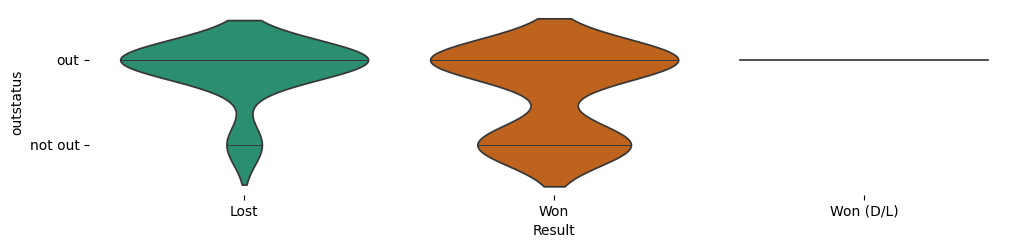

In [10]:

figsize = (12, 1.2 * len(data['outstatus'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Result', y='outstatus', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data['Score']=data['Score'].str.replace('*','')
data.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result,outstatus
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,28-May-10,Lost,out
1,2,101,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,30-May-10,Won,not out
2,3,141,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,16-Oct-13,Won,not out
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,02-Nov-13,Won,out
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,06-Nov-13,Won,out


In [ ]:
data.head(3)

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result,outstatus
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,2010-05-28,Lost,out
1,2,101,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,2010-05-30,Won,not out
2,3,141,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,2013-10-16,Won,not out


In [ ]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)
data.dtypes

<ipython-input-24-919b7d7929e0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']=pd.to_datetime(data['Date'],dayfirst=True)


No.                   int64
Score                object
Against              object
Position              int64
Innings               int64
Venue                object
Ground               object
Date         datetime64[ns]
Result               object
outstatus            object
dtype: object

<ipython-input-14-990c6245717d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Ground'],palette="Set2")


Text(0.5, 1.0, 'What does he prefer? Home/Away/Neutral')

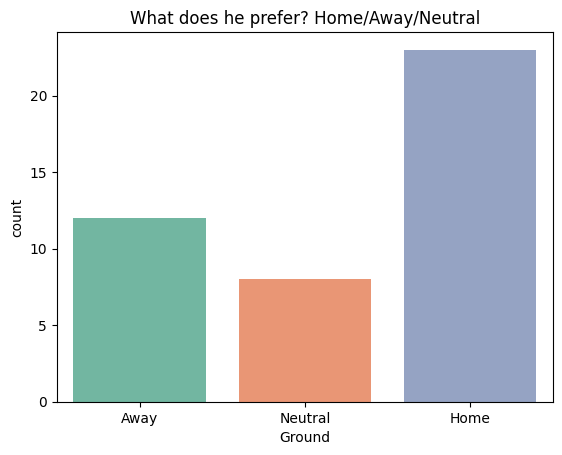

In [ ]:
sns.countplot(x=data['Ground'],palette="Set2")
plt.title('What does he prefer? Home/Away/Neutral')

In [ ]:
data['Score']=pd.to_numeric(data['Score'],errors='coerce')
data.dtypes

No.                   int64
Score                 int64
Against              object
Position              int64
Innings               int64
Venue                object
Ground               object
Date         datetime64[ns]
Result               object
outstatus            object
dtype: object

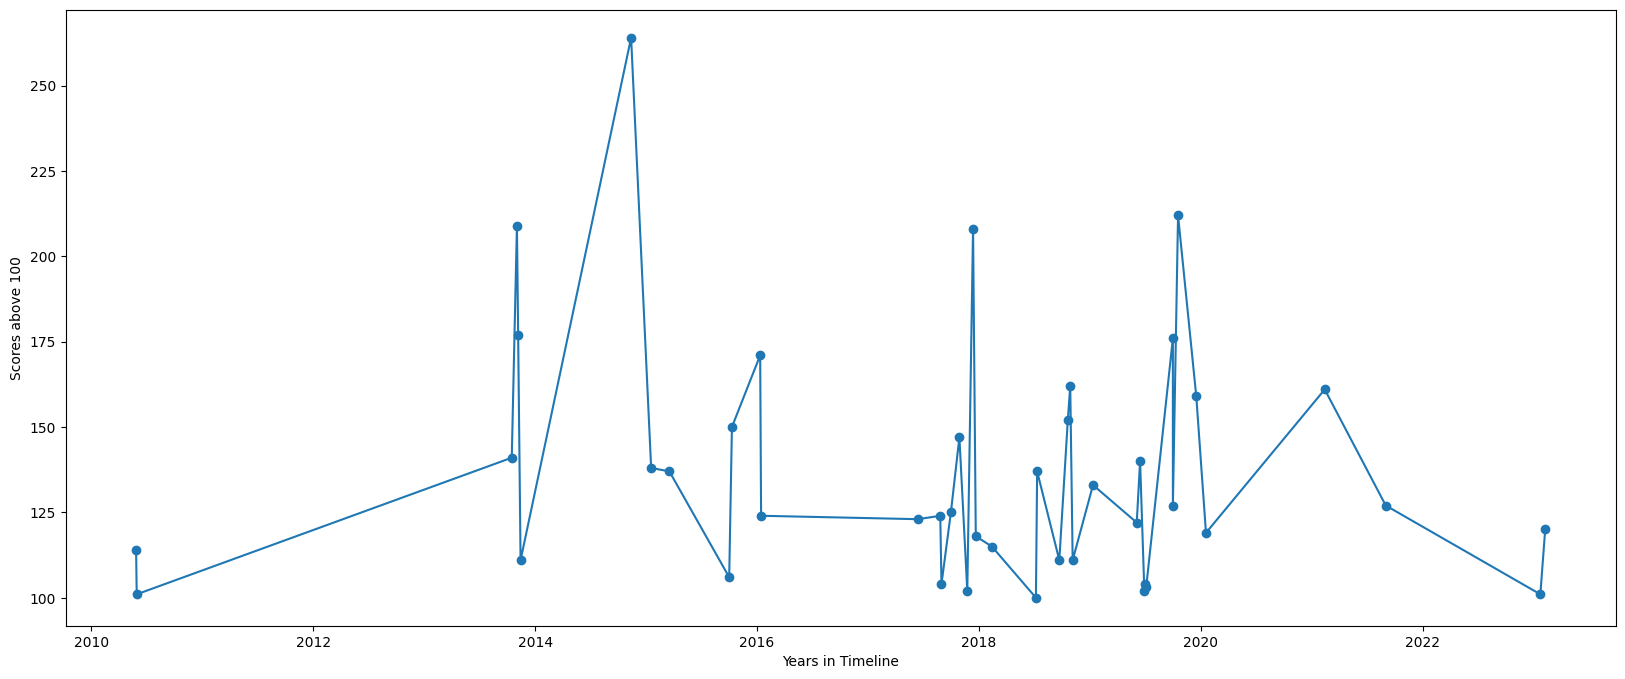

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data['Date'],data['Score'],marker='o')
plt.xlabel('Years in Timeline')
plt.ylabel('Scores above 100')
plt.show()

<ipython-input-31-7e0d937f515e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Position'],y=data['Score'],palette="Set2")


Text(0.5, 1.0, 'Distribution of Scores across positions')

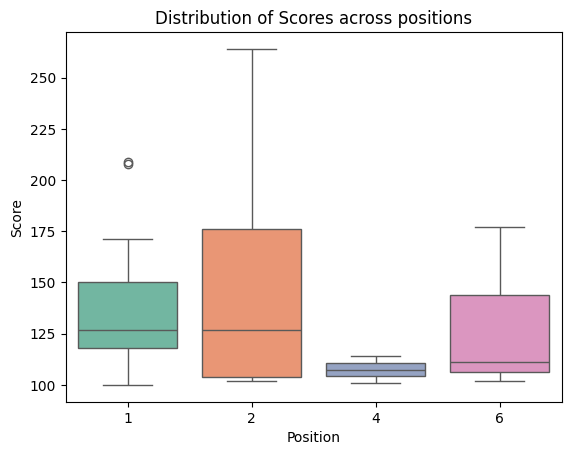

In [ ]:
sns.boxplot(x=data['Position'],y=data['Score'],palette="Set2")
plt.xlabel('Position')
plt.ylabel('Score')
plt.title('Distribution of Scores across positions')

In [ ]:
countries=data['Against'].value_counts()
countries

Against
 Australia       9
 Sri Lanka       8
 South Africa    7
 West Indies     6
 England         5
 Bangladesh      3
 New Zealand     2
 Pakistan        2
 Zimbabwe        1
Name: count, dtype: int64

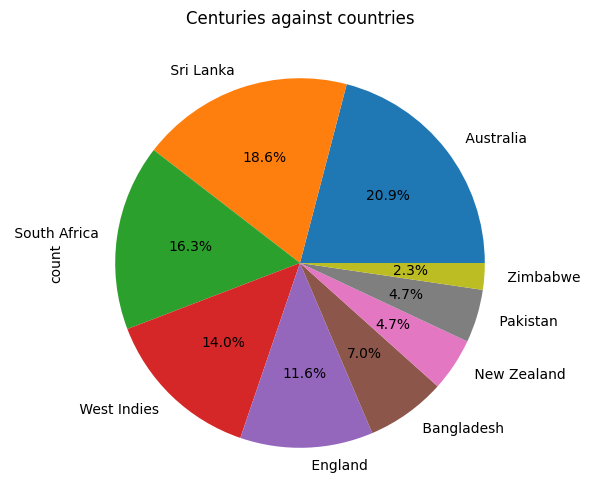

In [ ]:
plt.figure(figsize=(12,6))
countries.plot(kind='pie',autopct="%1.1f%%")
plt.title('Centuries against countries')
plt.show()